# Proyek Analisis Data: Bike Sharing
- **Nama:** Wilbert Neilson Sachio
- **Email:** willbert1206@gmail.com
- **ID Dicoding:** wilbertneilsonsachio

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh kondisi weather dan season terhadap jumlah sepeda yang disewa?
- Bagaimana tren penyewaan sepeda bervariasi berdasarkan bulan dalam setahun?
- Bagaimana tren penyewaan sepeda bervariasi berdasarkan jam dalam sehari?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score

c:\Users\willb\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


## Data Wrangling

### Gathering Data

In [2]:
data = pd.read_csv("./data/hour.csv")
data

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01/01/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,01/01/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,01/01/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,01/01/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,01/01/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,31/12/2012,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,31/12/2012,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,31/12/2012,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,31/12/2012,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


Berdasarkan informasi diatas, kita dapat melihat data memiliki 17 ribu baris dan 17 kolom

### Assessing Data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [4]:
data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Dari informasi diatas, kita dapat menarik kesimpulan jika setiap baris pada setiap kolom tidak memiliki nilai Null karena Non-Null Count = entries.
Untuk memastikan hal tersebut, jalankan kode dibawah.

In [5]:
data.isnull().sum() 

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Selain dari itu, kolom 'dteday' masih memiliki tipe data object.

In [6]:
data['dteday'] = pd.to_datetime(data['dteday'], dayfirst=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Tipe data berhasil diubah dengan argumen dayfirst=True karena default format adalah "%m/%d/%Y".

Selanjutnya mari kita lihat berapa data yang diulang/duplikasi.

In [7]:
data.duplicated().sum()

0

Kode diatas menunjukkan jikalau tidak terdapat data duplikat pada dataset, yang berarti setiap baris adalah data yang unik.

In [8]:
data.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


Semua data yang ditampilkan diatas terlihat baik dan konsisten, tidak ada data yang tidak relevan.
Namun terdapat beberapa kolom kategorikal yang perlu diubah menjadi kata2 yang lebih mudah dipahami

### Cleaning Data

Mari mulai pembersihan data dengan menghapus data yang berada diluar ambang batas.
Di bawah adalah sebuah fungsi untuk mendeteksi outlier

In [9]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

In [10]:
numeric_columns = ['cnt', 'temp', 'atemp', 'hum', 'windspeed']

for column in numeric_columns:
    outliers = detect_outliers_iqr(data, column)
    print(f"Number of outliers in {column}: {len(outliers)}\n")
    data = data[~data.index.isin(outliers.index)]



Number of outliers in cnt: 505

Number of outliers in temp: 0

Number of outliers in atemp: 0

Number of outliers in hum: 22

Number of outliers in windspeed: 330



In [11]:
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Kita telah berhasil menghilangkan outlier pada dataset yang ditandai dengan berkurangnya jumlah baris/rows.

Dalam kasus ini kita tidak akan melakukan pembersihan pada data yang duplikat atau null dikarenakan tidak terdapat data yang termasuk dalam kategori tersebut.

In [12]:
mapping_dict = {
    'yr': {0: 2011, 1: 2012},
    'weekday': {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'},
    'season': {1: "springer", 2: "summer", 3: "fall", 4: "winter"},
    'weathersit': {1: "clear", 2: "mist & cloudy", 3: "light rain/light snow", 4: "heavy rain/snow"},
    'weathersit': {1: "clear", 2: "mist & cloudy", 3: "light rain/light snow", 4: "heavy rain/snow"},
}

data.replace(mapping_dict, inplace=True)

# Drop kolom tak relevan
data.drop(columns=['instant'], inplace=True)

data.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,springer,2011,1,0,0,Saturday,0,clear,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,springer,2011,1,1,0,Saturday,0,clear,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,springer,2011,1,2,0,Saturday,0,clear,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,springer,2011,1,3,0,Saturday,0,clear,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,springer,2011,1,4,0,Saturday,0,clear,0.24,0.2879,0.75,0.0,0,1,1


Telah berhasil melakukan perubahan pada data yang bersifat ketegorikal yaitu season(musim), weekday(nama hari), dan weathersit(kondisi cuaca)

In [13]:
data.rename(columns={
    'cnt': 'total',
    'yr': 'year',
    'mnth': 'month',
    'hr' : 'hour',
    'weathersit': 'weather_condition',
    'hum' : 'humidity',
    'temp' : 'temperature',
    'atemp' : 'apparent_temp'
}, inplace=True)

data.head()

,dteday,season,year,month,hour,holiday,weekday,workingday,weather_condition,temperature,apparent_temp,humidity,windspeed,casual,registered,total
0,2011-01-01,springer,2011,1,0,0,Saturday,0,clear,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,springer,2011,1,1,0,Saturday,0,clear,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,springer,2011,1,2,0,Saturday,0,clear,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,springer,2011,1,3,0,Saturday,0,clear,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,springer,2011,1,4,0,Saturday,0,clear,0.24,0.2879,0.75,0.0,0,1,1


Disini kita juga mengubah nama kolom agar lebih mudah dimengerti.


In [14]:
data['day'] = data['dteday'].dt.day
month_index = data.columns.get_loc('month')
data.insert(month_index + 1, 'day', data.pop('day'))
data.head()

,dteday,season,year,month,day,hour,holiday,weekday,workingday,weather_condition,temperature,apparent_temp,humidity,windspeed,casual,registered,total
0,2011-01-01,springer,2011,1,1,0,0,Saturday,0,clear,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,springer,2011,1,1,1,0,Saturday,0,clear,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,springer,2011,1,1,2,0,Saturday,0,clear,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,springer,2011,1,1,3,0,Saturday,0,clear,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,springer,2011,1,1,4,0,Saturday,0,clear,0.24,0.2879,0.75,0.0,0,1,1


## Exploratory Data Analysis (EDA)

In [15]:
data.describe(include='all')

,dteday,season,year,month,day,hour,holiday,weekday,workingday,weather_condition,temperature,apparent_temp,humidity,windspeed,casual,registered,total
count,16522,16522,16522.000000,16522.000000,16522.000000,16522.000000,16522.000000,16522,16522.000000,16522,16522.000000,16522.000000,16522.000000,16522.000000,16522.000000,16522.000000,16522.000000
unique,NaN,4,NaN,NaN,NaN,NaN,NaN,7,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,fall,NaN,NaN,NaN,NaN,NaN,Sunday,NaN,clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4266,NaN,NaN,NaN,NaN,NaN,2434,NaN,10798,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2011-12-28 06:38:49.693741568,NaN,2011.488198,6.549389,15.689384,11.413993,0.029657,NaN,0.678550,NaN,0.493968,0.473471,0.634248,0.182329,33.554231,139.535286,173.089517
min,2011-01-01 00:00:00,NaN,2011.000000,1.000000,1.000000,0.000000,0.000000,NaN,0.000000,NaN,0.020000,0.000000,0.080000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-01 00:00:00,NaN,2011.000000,4.000000,8.000000,5.000000,0.000000,NaN,0.000000,NaN,0.340000,0.333300,0.490000,0.104500,4.000000,32.000000,37.000000
50%,2011-12-23 00:00:00,NaN,2011.000000,7.000000,16.000000,11.000000,0.000000,NaN,1.000000,NaN,0.500000,0.484800,0.640000,0.164200,16.000000,111.000000,135.500000
75%,2012-06-25 00:00:00,NaN,2012.000000,10.000000,23.000000,17.000000,0.000000,NaN,1.000000,NaN,0.640000,0.621200,0.790000,0.253700,46.000000,209.000000,267.000000
max,2012-12-31 00:00:00,NaN,2012.000000,12.000000,31.000000,23.000000,1.000000,NaN,1.000000,NaN,1.000000,1.000000,1.000000,0.462700,354.000000,629.000000,642.000000


Berdasarkan data diatas didapat beberapa kesimpulan
- Rata-rata total penyewaan sepeda perjamnya adalah 173
- Data paling sering dikumpulkan ketika musim gugur, pada hari Minggu, disaat cuaca cerah

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16522 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   dteday             16522 non-null  datetime64[ns]
 1   season             16522 non-null  object        
 2   year               16522 non-null  int64         
 3   month              16522 non-null  int64         
 4   day                16522 non-null  int32         
 5   hour               16522 non-null  int64         
 6   holiday            16522 non-null  int64         
 7   weekday            16522 non-null  object        
 8   workingday         16522 non-null  int64         
 9   weather_condition  16522 non-null  object        
 10  temperature        16522 non-null  float64       
 11  apparent_temp      16522 non-null  float64       
 12  humidity           16522 non-null  float64       
 13  windspeed          16522 non-null  float64       
 14  casual     

In [17]:
numerical_cols = data.select_dtypes(include=['int64', 'int32', 'float64']).columns.tolist()
categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()


In [18]:
numerical_cols

['year',
 'month',
 'day',
 'hour',
 'holiday',
 'workingday',
 'temperature',
 'apparent_temp',
 'humidity',
 'windspeed',
 'casual',
 'registered',
 'total']

In [19]:
categorical_cols

['season', 'weekday', 'weather_condition']

Diatas kita telah menginisialisasi ulang kolom yang bernilai kategorikal dan numerical agar lebih mudah dalam mengolah data kedepannya

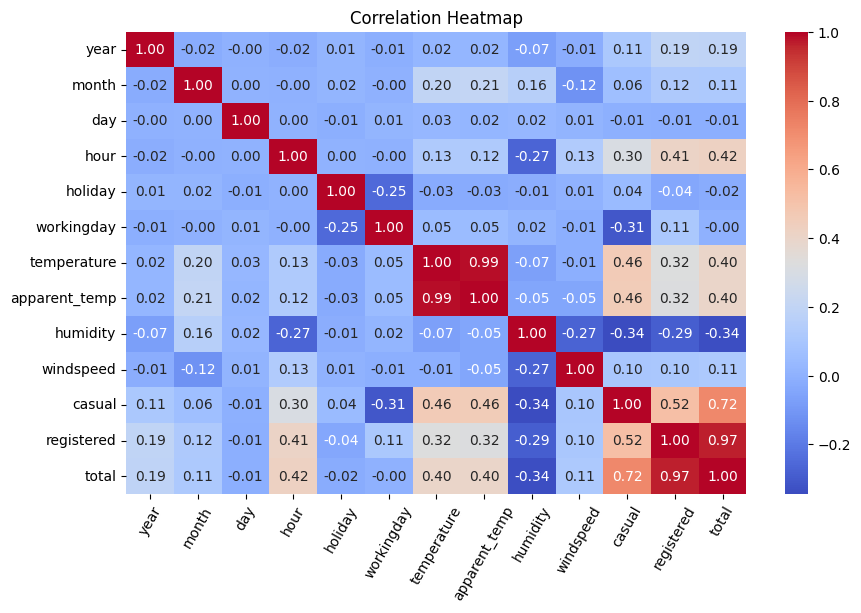

In [20]:
correlation_matrix = data[numerical_cols].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.xticks(rotation=60)
plt.show()

Berdasarkan Tabel korelasi diatas, terdapat beberapa faktor yang sedikit berkorelasi dengan total penyewaan yaitu 'hour' dan 'temperature/apparent_temp'. Terdapat juga beberapa koordinat yang terlihat sangat berkorelasi, namun hal tersebut adalah sesuatu yang sudah dapat diduga dikarenakan origin dari data tersebut, seperti:
- 'temperature' dan 'apparent_temp' akan sangat berkorelasi dikarenakan dua fitur ini hanyalah perbedaan interpertasi pada suhu suatu hari.
- 'casual' dan 'registered' berkorelasi dengan 'total' karena kolom 'total' adalah hasil penjumlahan dari kedua fitur tersebut.

Hal ini berarti masyarakat memiliki kecenderungan dalam menyewa sepeda berdasarkan jam ataupun suhu.

In [21]:
data.groupby(by="weather_condition").agg({
    "total": ["sum", "max", "min", "mean"]
})

total                     
                           sum  max min        mean
weather_condition                                  
clear                  2004441  642   1  185.630765
heavy rain/snow            223  164  23   74.333333
light rain/light snow   143420  627   1  107.270007
mist & cloudy           711701  642   1  162.340557

In [22]:
data.groupby(by="hour").agg({
    "total": ["sum", "max", "min", "mean"]
})

total                     
         sum  max min        mean
hour                             
0      38984  283   2   54.069348
1      24101  168   1   33.566852
2      16247  132   1   22.947740
3       8119   79   1   11.783745
4       4407   28   1    6.414847
5      14154   66   1   19.907173
6      54722  213   1   76.108484
7     154112  596   1  212.568276
8     168474  641   5  286.033956
9     156299  426  14  220.139437
10    124213  539   8  174.947887
11    148039  627  10  208.212377
12    167262  642   3  245.252199
13    165865  638  11  241.785714
14    161255  640  14  234.723435
15    168583  640   7  245.390102
16    214770  642  11  307.693410
17    208215  638  25  375.839350
18    203276  642  23  352.909722
19    214701  640  16  308.035868
20    161819  567  11  228.235543
21    124028  584  11  173.952314
22     94453  502   9  132.287115
23     63687  256   2   88.331484

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh kondisi weather dan season terhadap jumlah sepeda yang disewa?

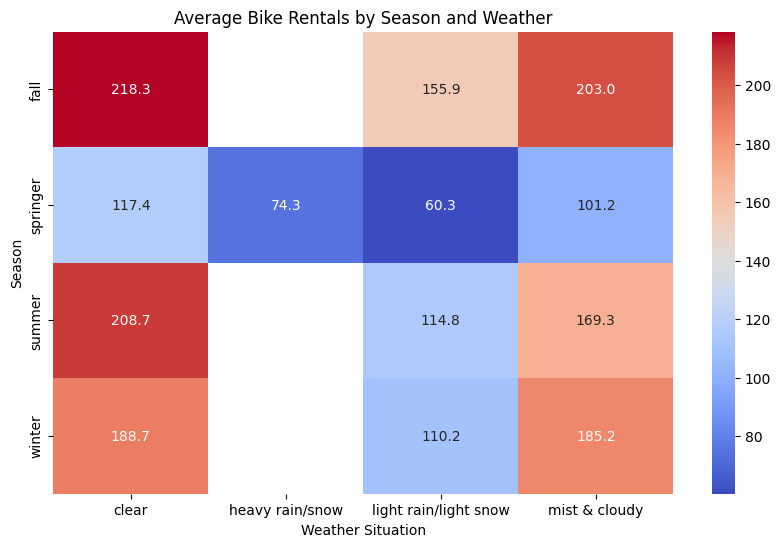

In [23]:
# Gabungkan season dan weather situation
season_weather_group = data.groupby(['season', 'weather_condition']).agg({'total': 'mean'}).reset_index()

# Buat pivot tablenya
season_weather_pivot = season_weather_group.pivot(index='season', columns='weather_condition', values='total')

# Visualisasikan dengan menggunakan heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(season_weather_pivot, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Average Bike Rentals by Season and Weather')
plt.xlabel('Weather Situation')
plt.ylabel('Season')
plt.show()


### Pertanyaan 2: Bagaimana tren penyewaan sepeda bervariasi berdasarkan bulan dalam setahun?

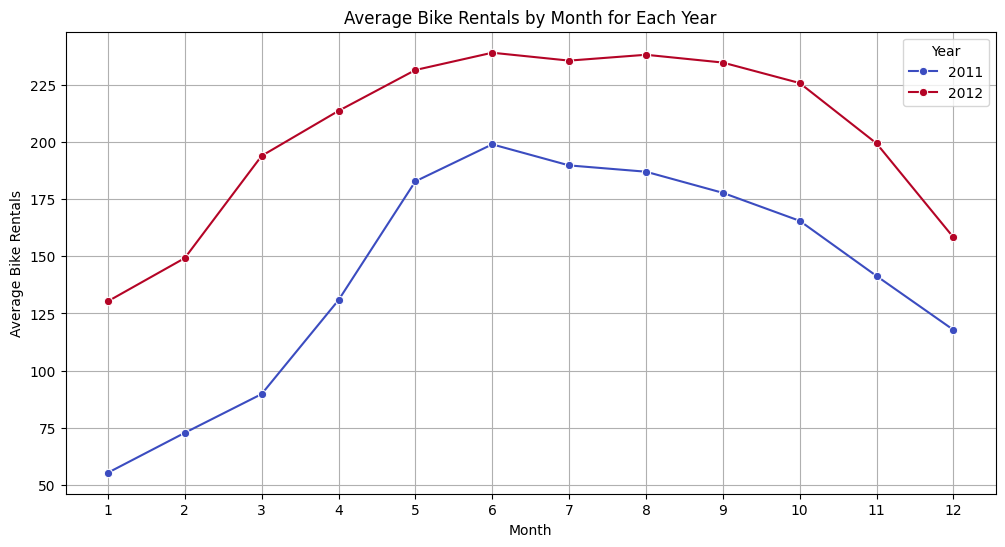

In [24]:
# Gabungkan berdasarkan bulan pertahun dan hitung rata-rata
monthly_rentals = data.groupby(['year', 'month']).agg({'total': 'mean'}).reset_index()

# Plot tren penyewaan berdasarkan bulan pertahun
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='total', hue='year', data=monthly_rentals, marker='o', palette='coolwarm')

plt.title('Average Bike Rentals by Month for Each Year')
plt.xlabel('Month')
plt.ylabel('Average Bike Rentals')
plt.xticks(range(1, 13))
plt.legend(title='Year')
plt.grid(True)

plt.show()

### Pertanyaan 3: Bagaimana tren penyewaan sepeda bervariasi berdasarkan jam dalam sehari?

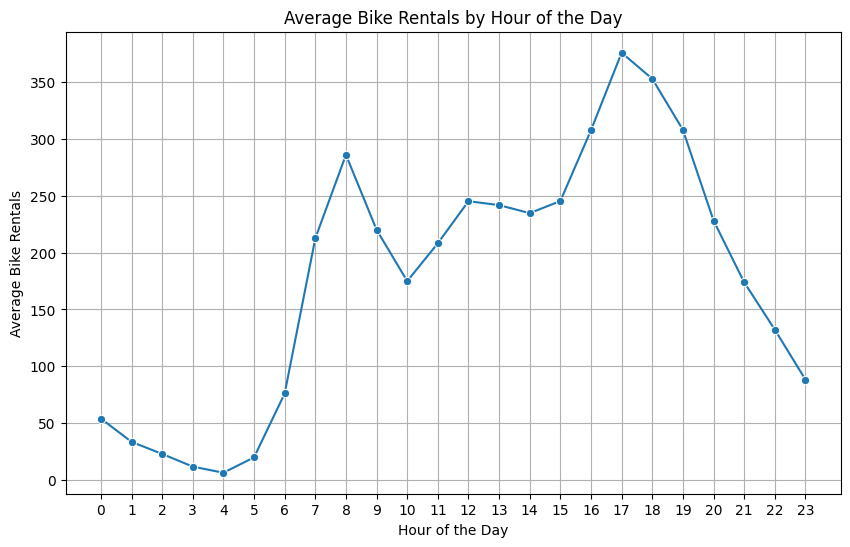

In [25]:
# Gabungkan berdasarkan jam dan hitung rata-rata
hourly_rentals = data.groupby('hour').agg({'total': 'mean'}).reset_index()

# Plot tren penyewaan berdasarkan jam
plt.figure(figsize=(10, 6))
sns.lineplot(x='hour', y='total', data=hourly_rentals, marker='o')
plt.title('Average Bike Rentals by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Bike Rentals')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

## Analisis Lanjutan: Clustering (Manual Grouping)

Clustering Manual Grouping berbasis demand digunakan untuk mengelompokkan data berdasarkan jumlah penyewaan sepeda (total). kita akan membagi data ke dalam tiga kategori utama:

Low Demand → Jumlah penyewaan rendah

Medium Demand → Jumlah penyewaan sedang

High Demand → Jumlah penyewaan tinggi

Kategori ini ditentukan berdasarkan kuantil (quantile) untuk membagi data secara merata.

In [26]:
# Definisikan ambang batas berdasarkan demand
low_threshold = data['total'].quantile(0.33)   
high_threshold = data['total'].quantile(0.66) 

def categorize_demand(rentals):
    if rentals <= low_threshold:
        return 'Low Demand'
    elif rentals <= high_threshold:
        return 'Medium Demand'
    else:
        return 'High Demand'

# Aplikasikan fungsi untuk menambahkan kolom baru
data['demand_category'] = data['total'].apply(categorize_demand)
data['demand_category'].value_counts()

demand_category
High Demand      5617
Low Demand       5464
Medium Demand    5441
Name: count, dtype: int64

Kategori Low, Medium, dan High akan terbentuk secara otomatis berdasarkan distribusi data.

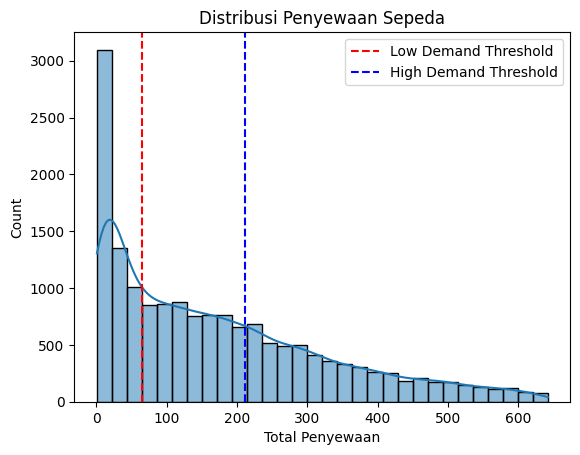

In [27]:
sns.histplot(data['total'], bins=30, kde=True)
plt.axvline(low_threshold, color='red', linestyle='dashed', label="Low Demand Threshold")
plt.axvline(high_threshold, color='blue', linestyle='dashed', label="High Demand Threshold")
plt.title('Distribusi Penyewaan Sepeda')
plt.xlabel('Total Penyewaan')
plt.legend()
plt.show()

Berdasarkan kemungkinan, dapat dikatakan bahwa sekitar 33% dari total penyewaan sepeda adalah permintaan rendah, sedangkan sekitar 34% adalah permintaan sedang, dan sekitar 33% adalah permintaan tinggi. dengan distribusi yang skewed ke kiri.

## Conclusion

### Pertanyaan 1: 
Hasil analisis menunjukkan bahwa jumlah penyewaan sepeda tertinggi terjadi pada musim gugur (season 3) dengan kondisi cuaca cerah atau berawan sebagian (weather 1), yang dapat disebabkan oleh suhu yang nyaman dan cuaca yang mendukung untuk aktivitas di luar ruangan. Sebaliknya, penyewaan sepeda terendah terjadi pada musim semi (season 1) dengan kondisi cuaca berupa hujan ringan atau salju ringan (weather 3), yang membuat aktivitas di luar ruangan seperti bersepeda menjadi kurang nyaman.

### Pertanyaan 2:
Melihat visualisasi tren berdasarkan rata-rata penyewaan sepeda dalam bulan pertahun, terlihat terdapat peningkatan signifikan dari tahun 2011 ke 2012. Dan informasi tambahan yang kita dapatkan adalah terjadinya peningkatan penyewaan sepeda pada bulan 5 hingga 8, dimana bulan tersebut adalah waktu ketika musim panas (summer) berlangsung.

### Pertanyaan 3: 
Dari visualisasi tren per jam, puncak penyewaan terjadi pada pagi hari sekitar pukul 8 dan sore hari sekitar pukul 17-18. Hal ini mengindikasikan bahwa sepeda banyak digunakan oleh pekerja yang bepergian selama jam sibuk.

In [28]:
data.to_csv("all_data.csv", index=False)